In [55]:
import pandas as pd
import numpy as np
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import seaborn as sns

In [25]:
#Load the tips dataset.

tips = data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


Create a column named tip_percentage. This should be the tip amount divided by the total bill.

In [26]:
tips['tip_percentage'] = tips.tip/tips.total_bill
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


Create a column named price_per_person. This should be the total bill divided by the party size.

In [27]:
tips['price_per_person'] = tips.total_bill/tips.size
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,0.008704
2,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,0.005297
3,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,0.010763
4,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,0.012131
5,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,0.012597


Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount? The tip percentage?

Total bill amount and size might be best feature for predicting the tip amount and tip percentage

Use all the other numeric features to predict tip amount. Use select k best and recursive feature elimination to select the top 2 features. What are they?

In [28]:
seed = 123

train, test = train_test_split(tips, train_size=.80, random_state=seed)

print(train.shape, test.shape)
train

(195, 9) (49, 9)


,total_bill,tip,sex,smoker,day,time,size,tip_percentage,price_per_person
24,39.42,7.58,Male,No,Sat,Dinner,4,0.192288,0.020195
191,15.69,1.50,Male,Yes,Sun,Dinner,2,0.095602,0.008038
210,12.76,2.23,Female,Yes,Sat,Dinner,2,0.174765,0.006537
11,10.27,1.71,Male,No,Sun,Dinner,2,0.166504,0.005261
197,10.34,2.00,Male,Yes,Thur,Lunch,2,0.193424,0.005297
...,...,...,...,...,...,...,...,...,...
99,21.01,3.00,Male,Yes,Fri,Dinner,2,0.142789,0.010763
221,12.16,2.20,Male,Yes,Fri,Lunch,2,0.180921,0.006230
67,16.45,2.47,Female,No,Sat,Dinner,2,0.150152,0.008427
127,8.52,1.48,Male,No,Thur,Lunch,2,0.173709,0.004365


In [29]:
numeric_feature_columns = list(train._get_numeric_data().columns)
numeric_feature_columns

['total_bill', 'tip', 'size', 'tip_percentage', 'price_per_person']

In [30]:
categorical_feature_columns = list((set(train.columns)) - set(train._get_numeric_data().columns))
categorical_feature_columns

['smoker', 'sex', 'time', 'day']

In [31]:
X_train = train[['total_bill', 'size', 'price_per_person', 'tip_percentage']]
y_train = train['tip']
X_reduced2 = SelectKBest(f_regression, k=2).fit_transform(X_train, y_train)
print(X_reduced2.shape)

(195, 2)


In [32]:
f_selector = SelectKBest(f_regression, k = 2)
f_selector.fit(X_train, y_train)
X2 = f_selector.transform(X_train)



In [33]:
f_support = f_selector.get_support()

print(f_support)

[ True False  True False]


In [34]:
f_feature = X_train.loc[:,f_support].columns.tolist()

print(str(len(f_feature)), 'selected features')
print(f_feature)

2 selected features
['total_bill', 'price_per_person']


In [35]:
lm = LinearRegression()

In [36]:
rfe = RFE(lm, 2)

In [37]:
X_rfe = rfe.fit_transform(X_train,y_train)

In [39]:
mask = rfe.support_
rfe_features = X_train.loc[:,mask].columns.tolist()
print(str(len(rfe_features)), 'selected features')
print(rfe_features)

2 selected features
['total_bill', 'tip_percentage']


Use all the other numeric features to predict tip percentage. Use select k best and recursive feature elimination to select the top 2 features. What are they?

In [40]:
X_train = train[['total_bill', 'size', 'price_per_person']]
y_train = train['tip_percentage']


In [41]:
f_selector = SelectKBest(f_regression, k = 2)
f_selector.fit(X_train, y_train)
X2 = f_selector.transform(X_train)
f_support = f_selector.get_support()

print(f_support)

[ True False  True]


In [42]:
f_feature = X_train.loc[:,f_support].columns.tolist()

print(str(len(f_feature)), 'selected features')
print(f_feature)

2 selected features
['total_bill', 'price_per_person']


In [43]:
lm = LinearRegression()

In [44]:
rfe = RFE(lm, 2)

In [45]:
X_rfe = rfe.fit_transform(X_train,y_train)

In [46]:
mask = rfe.support_
rfe_features = X_train.loc[:,mask].columns.tolist()
print(str(len(rfe_features)), 'selected features')
print(rfe_features)

2 selected features
['total_bill', 'size']


Why do you think select k best and recursive feature elimination might give different answers for the top features? Does this change as you change the number of features your are selecting?

Write a function named select_kbest that takes in the predictors (X), the target (y), and the number of features to select (k) and returns the names of the top k selected features based on the SelectKBest class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [47]:
def select_kbest(X, y, n):
    f_selector = SelectKBest(f_regression, k = n)
    f_selector.fit(X, y)
    f_support = f_selector.get_support()
    f_feature = X.loc[:,f_support].columns.tolist()

    #print(str(len(f_feature)), 'selected features')
    #print(f_feature)

    #print(f_support)
    return f_feature
    

In [48]:
select_kbest(X_train, y_train, 2)

['total_bill', 'price_per_person']

Write a function named rfe that takes in the predictors, the target, and the number of features to select. It should return the top k features based on the RFE class. Test your function with the tips dataset. You should see the same results as when you did the process manually.

In [49]:
def rfe(X, y, n):
    lm = LinearRegression()
    rfe = RFE(lm, n)
    X_rfe = rfe.fit_transform(X,y)
    mask = rfe.support_
    rfe_features = X.loc[:,mask].columns.tolist()
    #print(str(len(rfe_features)), 'selected features')
    return rfe_features

In [50]:
rfe(X_train, y_train, 2)

['total_bill', 'size']

Load the swiss dataset and use all the other features to predict Fertility. Find the top 3 features using both select k best and recursive feature elimination (use the functions you just built to help you out).

In [3]:
df = data('swiss')

In [4]:
df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [51]:
X = df[['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality']]
y = df['Fertility']

In [53]:
select_kbest(X, y, 3)

['Examination', 'Education', 'Catholic']

In [24]:
rfe(X,y,3)

['Examination', 'Education', 'Infant.Mortality']

In [73]:
cols = df[['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality', 'Fertility']].corr().nlargest(5, 'Fertility')['Fertility'].index

In [74]:
print(cols)

                  Agriculture  Examination  Education  Catholic  \
Agriculture          1.000000    -0.686542  -0.639523  0.401095   
Examination         -0.686542     1.000000   0.698415 -0.572742   
Education           -0.639523     0.698415   1.000000 -0.153859   
Catholic             0.401095    -0.572742  -0.153859  1.000000   
Infant.Mortality    -0.060859    -0.114022  -0.099322  0.175496   
Fertility            0.353079    -0.645883  -0.663789  0.463685   

                  Infant.Mortality  Fertility  
Agriculture              -0.060859   0.353079  
Examination              -0.114022  -0.645883  
Education                -0.099322  -0.663789  
Catholic                  0.175496   0.463685  
Infant.Mortality          1.000000   0.416556  
Fertility                 0.416556   1.000000  


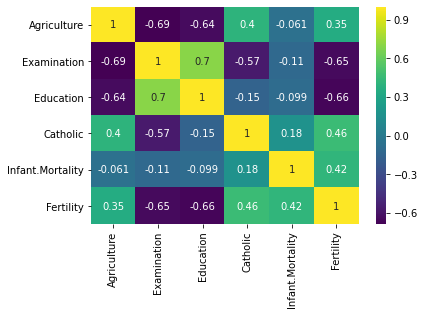

In [60]:
sns.heatmap(df[['Agriculture', 'Examination', 'Education', 'Catholic', 'Infant.Mortality', 'Fertility']].corr(), annot = True, cmap = 'viridis')